In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Read in the data
data = pd.read_csv('~/Desktop/datacamp/merged_inputed_data.csv')

## Drop features to prevent data leakage

In [8]:
to_drop = data.loc[:,[col for col in data.columns if col.startswith('test') and col.endswith(('_21', '_22', '_23', '_24'))]]

data.drop(to_drop, axis=1, inplace=True)

## Train the model

In [9]:
import shap
from sklearn.model_selection import train_test_split

X, y = data.drop('responder', axis=1), data['responder']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
# fit the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report

lr = LogisticRegression(max_iter=20000)
lr.fit(X_train, y_train)

# predict on test set
y_pred = lr.predict(X_test)

print('Test Accuracy: %0.3f' % accuracy_score(y_test,y_pred));

Test Accuracy: 0.897


In [11]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       196
           1       0.80      0.78      0.79        65

    accuracy                           0.90       261
   macro avg       0.86      0.86      0.86       261
weighted avg       0.90      0.90      0.90       261



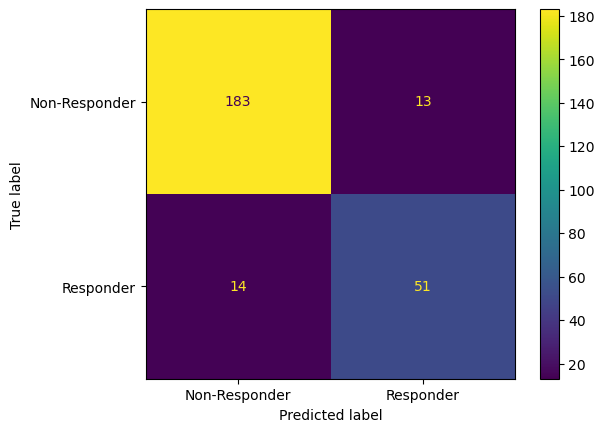

In [12]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Responder', 'Responder'])
disp.plot();

In [14]:
X_sub = shap.sample(X_train, 367)
ex = shap.Explainer(lr.predict_proba, X_sub,max_evals=700)
shap_values = ex(X_test.iloc[0:367])

Permutation explainer: 262it [00:11,  3.26it/s]                         


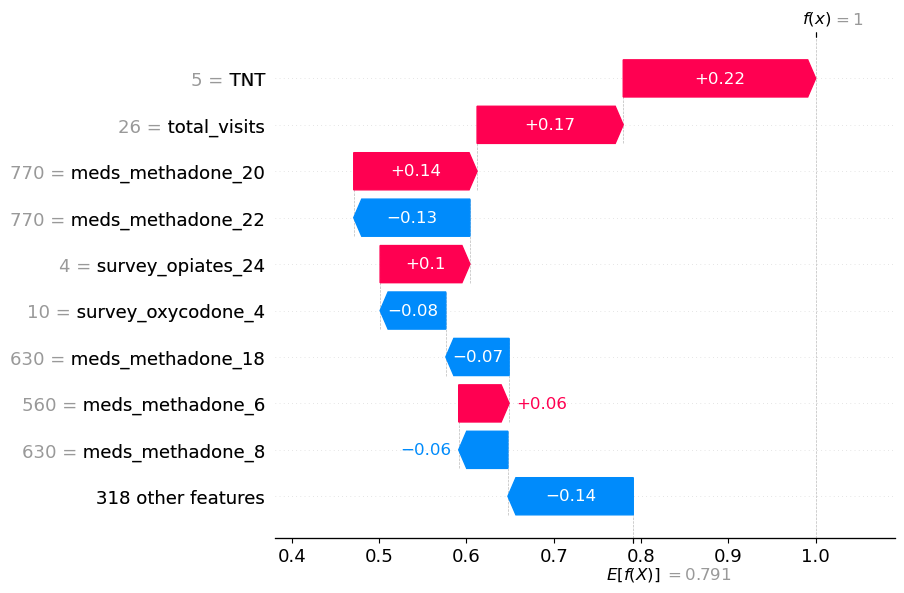

In [16]:
class_index = 0
data_index = 1
shap.plots.waterfall(shap_values[data_index,:,class_index])

In [ ]:
class_index = 0
data_index = 98
shap.plots.waterfall(shap_values[data_index,:,class_index])

In [ ]:
class_index = 1
data_index = 5
shap.plots.bar(shap_values[data_index,:,class_index])

In [ ]:
class_index = 1
data_index = np.random.choice(X_sub.shape[0], 1, replace=False)
print('data_index:', data_index )

shap.initjs()
shap.plots.force(shap_values[data_index,:,class_index], matplotlib=True)

In [ ]:
data_index = 2
class_index = 1

ex_logit = shap.Explainer(
model.predict_proba, X_sub, link=shap.links.logit)
sv_logit = ex_logit(X_test.iloc[0:100])

shap.plots.waterfall(sv_logit[data_index,:,class_index])

In [ ]:
class_index = 0
shap.plots.beeswarm(shap_values[:,:,class_index])

In [ ]:
shap.plots.force(sv_logit[0:20:,:,0])

In [ ]:
shap.plots.heatmap(sv_logit[:,:,class_index])